# PREDICTION WITH KNN

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# read dataset may2023
df = pd.read_pickle("../../data/20230319_RTU_Dataset_PPC-Lab/df1.pkl")  

In [16]:
df

,MEM_USAGE,CPU_USAGE,TEMP
time,,,
2023-01-30 12:11:56.788,35.555417,27.343750,28.687
2023-01-30 12:16:57.191,35.555417,6.367041,28.687
2023-01-30 12:21:57.606,35.555417,7.142857,28.687
2023-01-30 12:26:58.001,35.555417,27.306273,28.687
2023-01-30 12:31:58.396,35.555417,5.639098,28.687
...,...,...,...
2023-02-09 16:53:01.209,24.758905,72.426471,32.000
2023-02-09 16:58:02.548,24.758905,22.556391,23.750
2023-02-09 17:03:03.007,24.758905,8.267717,23.750


### Using TEMP to predict CPU

In [17]:
training_size = int(len(df) * 0.8)

x_train = [[i] for i in df["TEMP"]][:training_size]
y_train = [i for i in df["CPU_USAGE"]][:training_size]

x_test = [[i] for i in df["TEMP"]][training_size:]
y_test = [[i] for i in df["CPU_USAGE"]][training_size:]


# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
 
# fit the regressor with x and y data
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [18]:
Y_pred = regressor.predict(x_test)

In [19]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [20]:
print(mean_absolute_percentage_error(list(Y_pred), y_test))

60.911984369866936


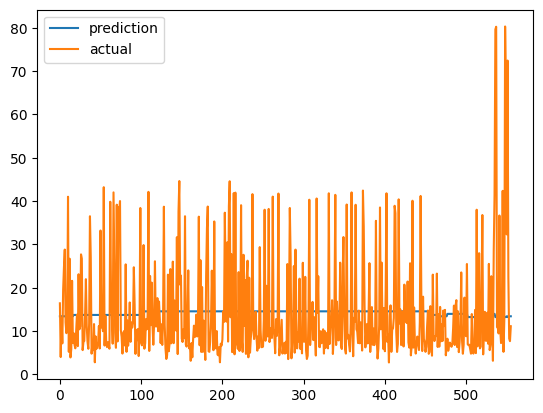

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x = range(len(list(Y_pred)))
y_pred = list(Y_pred)
y_actual = y_test

plt.plot(x, y_pred, label="prediction")
plt.plot(x, y_actual, label="actual")
plt.legend()
plt.show()

### Using CPU to predict TEMP

In [22]:
training_size = int(len(df) * 0.8)

x_train = [[i] for i in df["CPU_USAGE"]][:training_size]
y_train = [i for i in df["TEMP"]][:training_size]

x_test = [[i] for i in df["CPU_USAGE"]][training_size:]
y_test = [[i] for i in df["TEMP"]][training_size:]


# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
 
# fit the regressor with x and y data
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [23]:
Y_pred = regressor.predict(x_test)

In [24]:
print(mean_absolute_percentage_error(list(Y_pred), y_test))

15.694591330703734


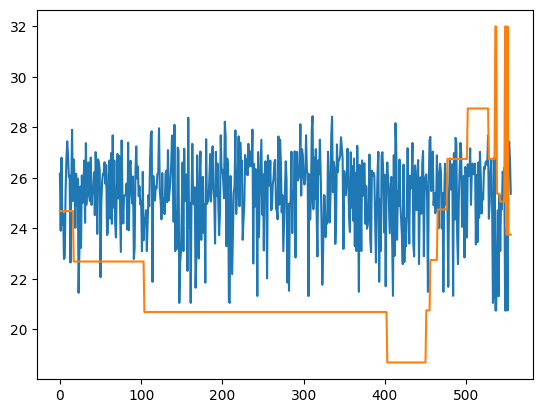

In [25]:
import matplotlib.pyplot as plt
import numpy as np

x = range(len(list(Y_pred)))
y_pred = list(Y_pred)
y_actual = y_test

plt.plot(x, y_pred)
plt.plot(x, y_actual)
plt.show()